# Problem I : Austro Motor Company Problem

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in analytics professional to improve the existing campaign.

**Import important libraries**

In [1]:
import pandas as pd #For Data Manipulation
import numpy as np #For mathematical operations
import seaborn as sns #Visulaization library
import matplotlib.pyplot as plt #Basic Visualization library
%matplotlib inline# Command to tell Python to actually display the graphs

UsageError: unrecognized arguments: Command to tell Python to actually display the graphs


In [2]:
# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

**Import data**

In [3]:
df = pd.read_csv('austo_automobile+(2)+(1).csv') 

## **A. What is the important technical information about the dataset that a database administrator would be interested in?**

In [4]:
print("the number of rows are: ",df.shape[0],"\nThe number of columns are: ",df.shape[1], 'in the dataset.')

the number of rows are:  1581 
The number of columns are:  14 in the dataset.


In [5]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:70% !important; }<\style>'))
df.head() # top 5 row to dataset

C:\Users\Dubey\AppData\Local\Temp\ipykernel_10568\3031819408.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.tail() # last 5 row of dataset

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [7]:
df.info() #basic info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


## **B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?**

In [8]:
# Searching null values in the dataset
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [9]:
# mode of gender 
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [10]:
# impute null values of gender with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
# check 
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [12]:
# imputing for partner salary

In [13]:
df.loc[(df['Partner_working'] == 'Yes'), 'Partner_salary'] =df['Total_salary']-df['Salary']
df.loc[(df['Partner_working'] == 'No'), 'Partner_salary'] =0

In [14]:
# check 
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [15]:
# Summary Statistics 
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,19233.776091,79625.996205,35597.722960
std,8.425978,0.943483,14674.825044,19670.391171,25545.857768,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25100.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38100.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [16]:
df.skew()

C:\Users\Dubey\AppData\Local\Temp\ipykernel_10568\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                 0.893087
No_of_Dependents   -0.129808
Salary             -0.011571
Partner_salary      0.441069
Total_salary        0.609706
Price               0.740874
dtype: float64

Anomalous values in categorical variables

In [17]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [18]:
print('Gender\n',  df['Gender'].value_counts())
print('\nProfession\n',df['Profession'].value_counts())
print('\nEducation\n',df['Education'].value_counts())
print('\nPersonal_loan\n',df['Personal_loan'].value_counts())
print('\nHouse_loan\n',df['House_loan'].value_counts())
print('\nPartner_working\n',df['Partner_working'].value_counts())
print('\nMake\n',df['Make'].value_counts())
print('\nMarital_status\n',df['Marital_status'].value_counts())

Gender
 Male      1252
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

Profession
 Salaried    896
Business    685
Name: Profession, dtype: int64

Education
 Post Graduate    985
Graduate         596
Name: Education, dtype: int64

Personal_loan
 Yes    792
No     789
Name: Personal_loan, dtype: int64

House_loan
 No     1054
Yes     527
Name: House_loan, dtype: int64

Partner_working
 Yes    868
No     713
Name: Partner_working, dtype: int64

Make
 Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

Marital_status
 Married    1443
Single      138
Name: Marital_status, dtype: int64


In [19]:
# as we can also see that there are spelling mistakes in the gender column which can be rectified  as followed 
df['Gender'] = df['Gender'].replace('Femal','Female')
df['Gender'] = df['Gender'].replace('Femle','Female')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

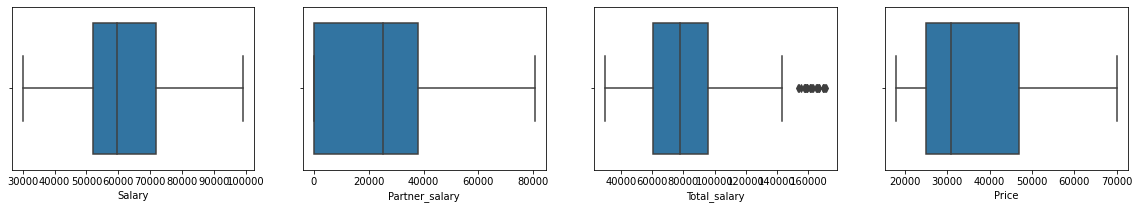

In [20]:
n_list=[ 'Salary', 'Partner_salary', 'Total_salary', 'Price','Age']
plt.figure(figsize=(20,3))
for i in range (0,4):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[n_list[i]]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


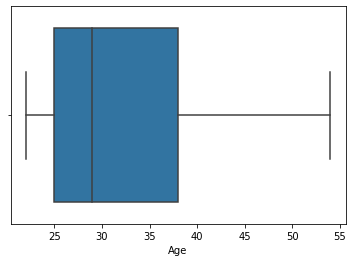

In [21]:
 sns.boxplot(df['Age']);

Creating two datasets to create solution for the two approach –

df- dataset with outlier

data_out – dataset without outlier

Outliers treated 

In [22]:
data_out = pd.read_csv('austo_automobile+(2)+(1).csv') #Read data from csv file

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range , upper_range

In [24]:
lrts,urts = remove_outlier(data_out['Total_salary'])

data_out['Total_salary']=np.where(data_out['Total_salary']>urts,urts,data_out['Total_salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boxplot without outilers 
 AxesSubplot(0.125,0.125;0.775x0.755)


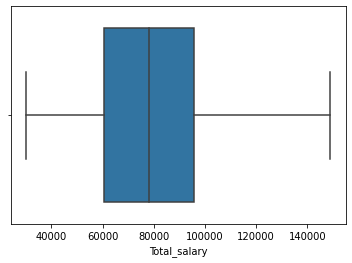

In [25]:
print('boxplot without outilers \n',sns.boxplot(data_out['Total_salary']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boxplot with outilers 
 AxesSubplot(0.125,0.125;0.775x0.755)


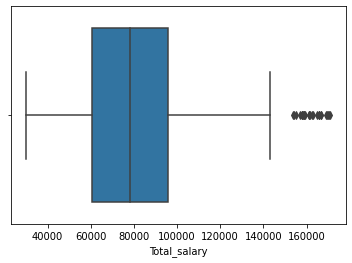

In [26]:
print('boxplot with outilers \n',sns.boxplot(df['Total_salary']))

## **C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.**

Univariate analysis 

In [27]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

<AxesSubplot:xlabel='Partner_salary'>

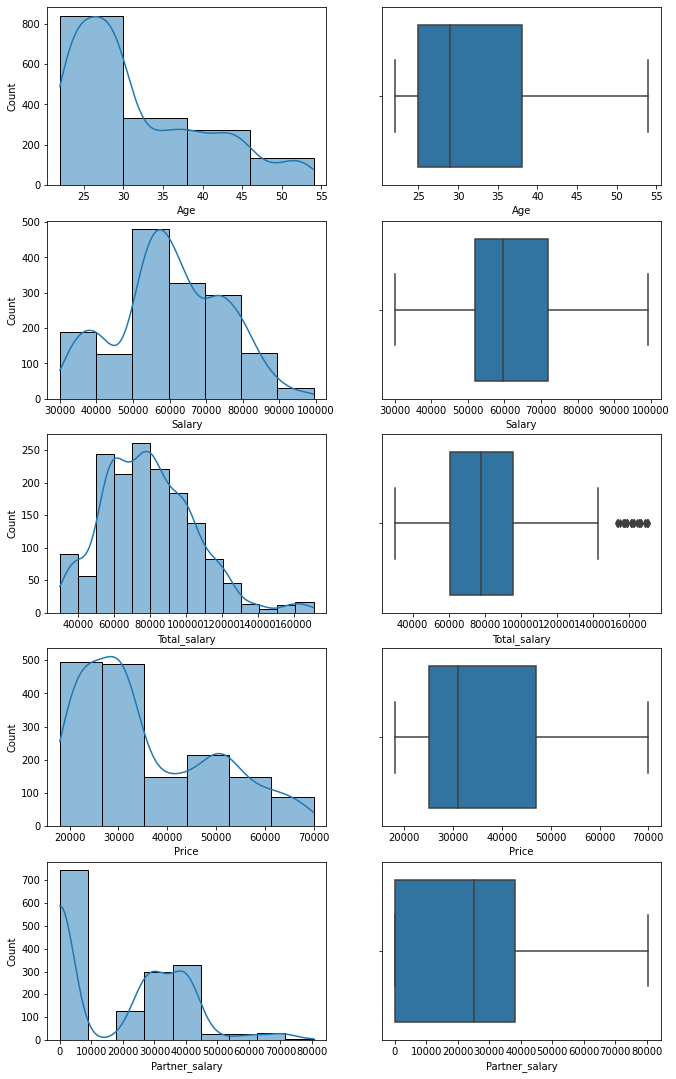

In [28]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(11,19)
sns.histplot(df['Age'],bins=4, kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Salary'] ,bins=7, kde=True, ax=axes[1][0])
sns.boxplot(x='Salary', data=df , ax=axes[1][1])
sns.histplot(df['Total_salary'] ,bins=14, kde=True, ax=axes[2][0])
sns.boxplot(x='Total_salary', data=df , ax=axes[2][1])
sns.histplot(df['Price'] ,bins=6, kde=True, ax=axes[3][0])
sns.boxplot(x='Price', data=df , ax=axes[3][1])
sns.histplot(df['Partner_salary'] ,bins=9, kde=True, ax=axes[4][0])
sns.boxplot(x='Partner_salary', data=df , ax=axes[4][1])

Total_salary after outlier treatment –


<AxesSubplot:xlabel='Total_salary'>

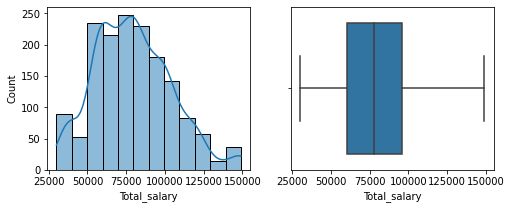

In [29]:
print('Total_salary after outlier treatment –')
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(8,3)
sns.histplot(data_out['Total_salary'] ,bins=12, kde=True, ax=axes [0])
sns.boxplot(x='Total_salary', data=data_out, ax=axes [1])

<AxesSubplot:xlabel='Make', ylabel='count'>

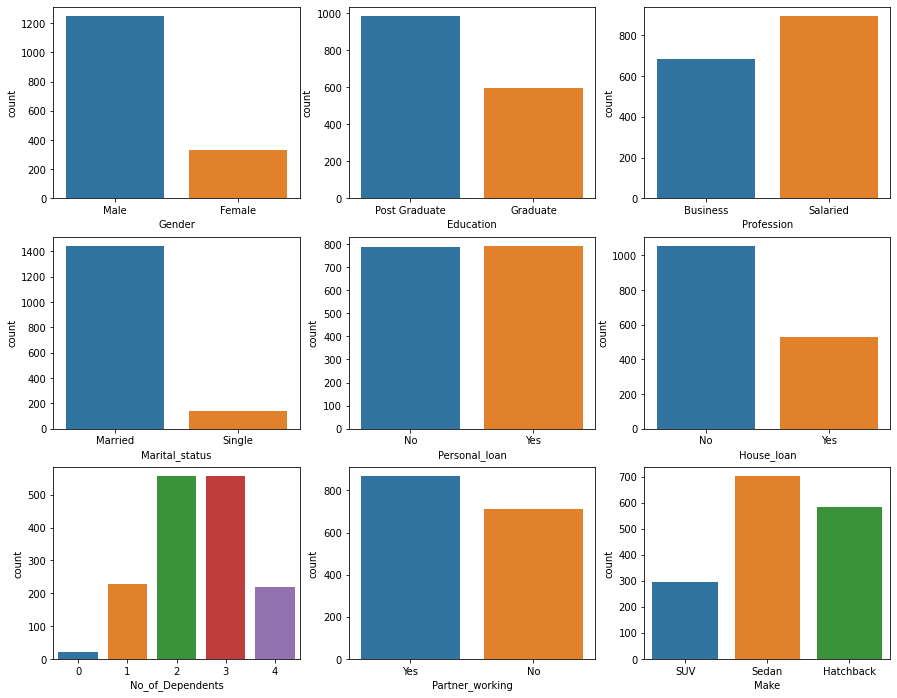

In [30]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,12)
sns.countplot(data=df, x='Gender',ax=axes[0][0])
sns.countplot(data=df, x='Education',ax=axes[0][1])
sns.countplot(data=df, x='Profession',ax=axes[0][2])
sns.countplot(data=df, x='Marital_status',ax=axes[1][0])
sns.countplot(data=df, x='Personal_loan',ax=axes[1][1])
sns.countplot(data=df, x='House_loan',ax=axes[1][2])
sns.countplot(data=df, x='No_of_Dependents',ax=axes[2][0])
sns.countplot(data=df, x='Partner_working',ax=axes[2][1])
sns.countplot(data=df, x='Make',ax=axes[2][2])

# **D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.**

Bivariate analysis 


plot on the Data set without treating outliers in Total_salary


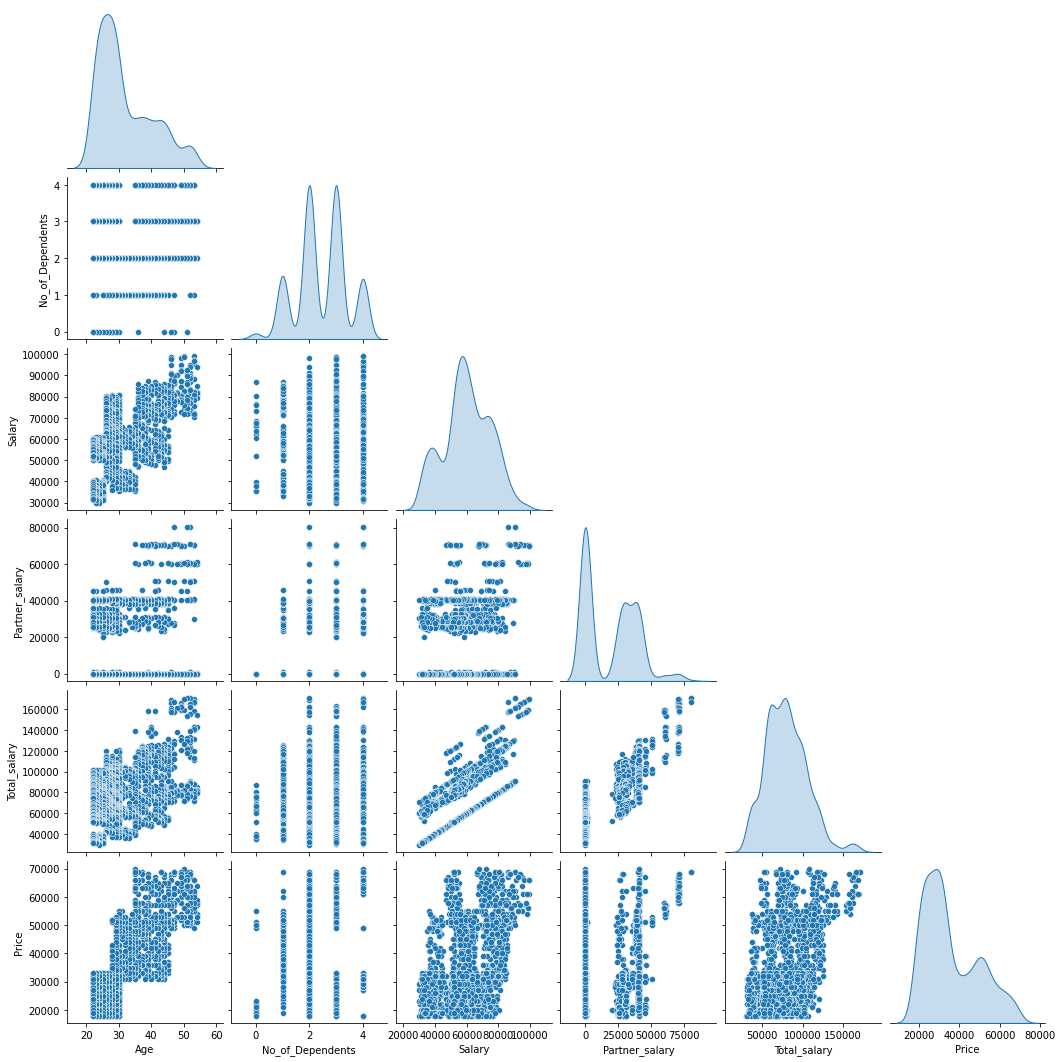

In [31]:
print('\nplot on the Data set without treating outliers in Total_salary')

sns.pairplot(df,vars=['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price'],corner=True,diag_kind='kde')


Correlation Heatmap without treating outliers in Total_salary 


<AxesSubplot:>

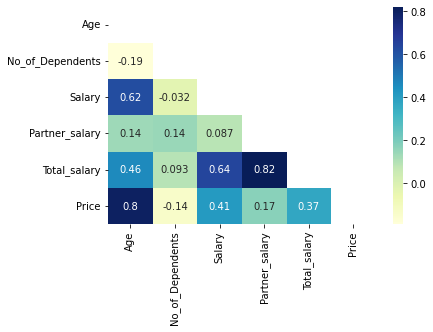

In [32]:
print('\nCorrelation Heatmap without treating outliers in Total_salary ')
mask = np.triu(np.ones_like(df.corr() , dtype=bool))
sns.heatmap(df[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(),mask=mask ,annot=True, cmap='YlGnBu')


plot on the Data set with treating outliers in Total_salary


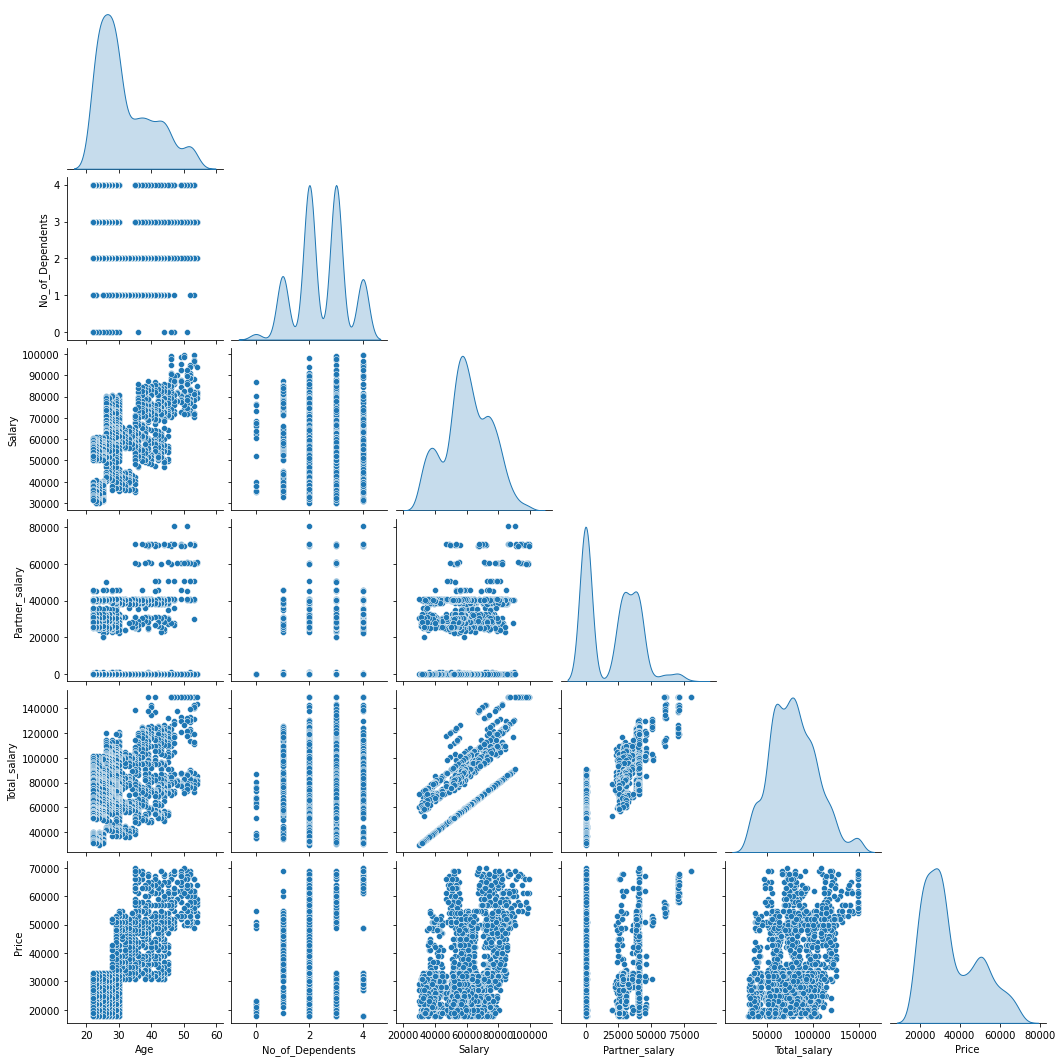

In [33]:
print('\nplot on the Data set with treating outliers in Total_salary')

sns.pairplot(data_out,vars=['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price'],corner=True,diag_kind='kde')


Correlation Heatmap with treating outliers in Total_salary 


<AxesSubplot:>

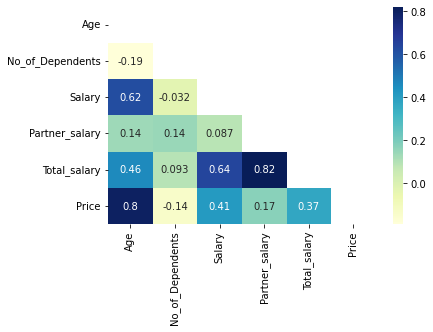

In [34]:
print('\nCorrelation Heatmap with treating outliers in Total_salary ')
mask = np.triu(np.ones_like(df.corr() , dtype=bool))
sns.heatmap(df[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(),mask=mask ,annot=True, cmap='YlGnBu')

Bivariate analysis of categorical 

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

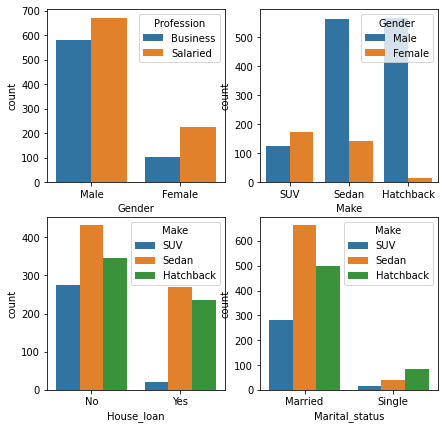

In [35]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(7,7)
sns.countplot(data=df, x='Gender', hue='Profession',ax=axes[0][0])
sns.countplot(data=df, x='Make', hue='Gender',ax=axes[0][1])
sns.countplot(data=df, x='House_loan', hue='Make',ax=axes[1][0])
sns.countplot(data=df, x='Marital_status', hue='Make',ax=axes[1][1])

Marital_status  Make     
Married         Sedan        664
                Hatchback    498
                SUV          281
Single          Hatchback     84
                Sedan         38
                SUV           16
Name: Make, dtype: int64


 Married    1443
Single      138
Name: Marital_status, dtype: int64 


martied: sedan 46.015246015246014
martied: Hatchback 34.511434511434516
martied: suv 19.47331947331947
single: sedan 27.536231884057973
single: Hatchback 60.86956521739131
single: suv 11.594202898550725 




Text(0.5, 0, 'Marital_status')

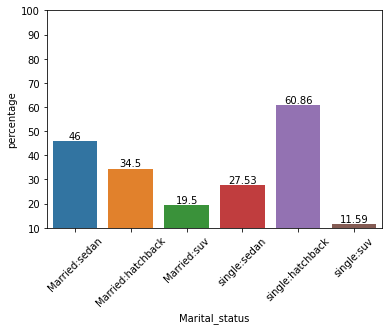

In [36]:
print(df.groupby('Marital_status')['Make'].value_counts())
print('\n\n',df.Marital_status.value_counts(),'\n\n')

print('martied: sedan',664/1443*100)
print('martied: Hatchback',498/1443*100)
print('martied: suv',281/1443*100)
print('single: sedan',38/138*100)
print('single: Hatchback',84/138*100)
print('single: suv',16/138*100,'\n\n')

plt.ylim([10,100])
data=pd.DataFrame({'Marital_ststus':['Married:sedan','Married:hatchback','Married:suv','single:sedan','single:hatchback','single:suv',],
                     'numbers': [46.0,34.5,19.5,27.53,60.86,11.59],
                    })
ax=sns.barplot(data=data,x='Marital_ststus',y='numbers',errwidth=0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.ylabel("percentage")
plt.xlabel("Marital_status")

No     1054
Yes     527
Name: House_loan, dtype: int64


 House_loan  Make     
No          Sedan        432
            Hatchback    347
            SUV          275
Yes         Sedan        270
            Hatchback    235
            SUV           22
Name: Make, dtype: int64 


no: sedan 40.98671726755218
no: hatchback 32.922201138519924
no: suv 26.091081593927896
yes: sedan 51.23339658444023
yes: Hatchback 44.59203036053131
yes: suv 4.174573055028463 




Text(0.5, 0, 'House_loan')

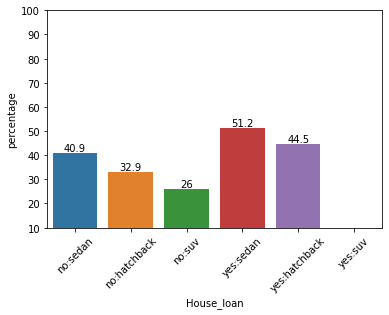

In [37]:
print(df['House_loan'].value_counts())
print('\n\n',df.groupby('House_loan')['Make'].value_counts(),'\n\n')

print('no: sedan',432/1054*100)
print('no: hatchback',347/1054*100)
print('no: suv',275/1054*100)
print('yes: sedan',270/527*100)
print('yes: Hatchback',235/527*100)
print('yes: suv',22/527*100,'\n\n')

plt.ylim([10,100])
datah=pd.DataFrame({'hl':['no:sedan','no:hatchback','no:suv','yes:sedan','yes:hatchback','yes:suv'],
                     'numbers': [40.9,32.9,26.0,51.2,44.5,4.2],
                    })
ax1=sns.barplot(data=datah,x='hl',y='numbers',errwidth=0)
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation=45)
plt.ylabel("percentage")
plt.xlabel("House_loan")

Male      1252
Female     329
Name: Gender, dtype: int64


 Gender  Profession
Female  Salaried      224
        Business      105
Male    Salaried      672
        Business      580
Name: Profession, dtype: int64 


female : salaried 68.08510638297872
female : Business 31.914893617021278
male : salaried 53.674121405750796
male : Business 46.325878594249204


Text(0.5, 0, 'Gender')

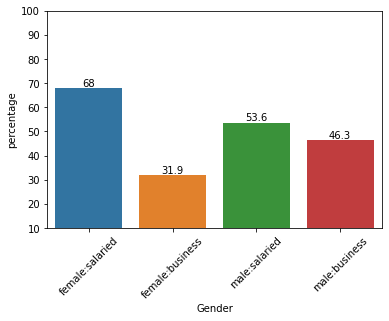

In [38]:
print(df['Gender'].value_counts())
print('\n\n',df.groupby('Gender')['Profession'].value_counts(),'\n\n')

print ('female : salaried',224/329*100)
print ('female : Business',105/329*100)
print ('male : salaried',672/1252*100)
print ('male : Business',580/1252*100)

plt.ylim([10,100])
datap=pd.DataFrame({'pl':['female:salaried','female:business','male:salaried','male:business'],
                     'numbers': [68.0,31.9,53.6,46.3],
                    })
ax2=sns.barplot(data=datap,x='pl',y='numbers',errwidth=0)
ax2.bar_label(ax2.containers[0])
plt.xticks(rotation=45)
plt.ylabel("percentage")
plt.xlabel("Gender")

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64


 Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64 


female : suv 58.24915824915825
male : suv 41.75084175084175
female : sedan 20.085470085470085
male : sedan 79.91452991452992
female : hatchback 2.5773195876288657
male : hachback 97.42268041237114 




Text(0.5, 0, 'Make')

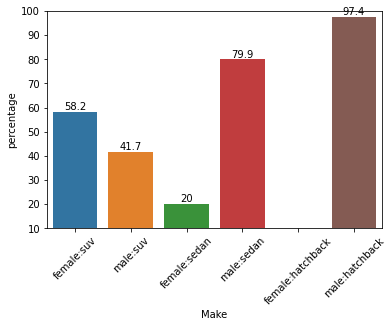

In [39]:
print(df['Make'].value_counts())
print('\n\n',df.groupby('Gender')['Make'].value_counts(),'\n\n')

print ('female : suv',173/297*100)
print ('male : suv',124/297*100)
print ('female : sedan',141/702*100)
print ('male : sedan',561/702*100)
print ('female : hatchback',15/582*100)
print ('male : hachback',567/582*100,'\n\n')

plt.ylim([10,100])
datamm=pd.DataFrame({'mml':['female:suv','male:suv','female:sedan','male:sedan','female:hatchback','male:hatchback'],
                     'numbers': [58.2,41.7,20.0,79.9,2.5,97.4],
                    })
ax3=sns.barplot(data=datamm,x='mml',y='numbers',errwidth=0)
ax3.bar_label(ax3.containers[0])
plt.xticks(rotation=45)
plt.ylabel("percentage")
plt.xlabel("Make")

## **E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.**

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [40]:
# E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

# Analysing the ratio of SUV purchases for both the Gender

In [41]:
# total number of male and femals
print('total number of male and femals\n',df['Gender'].value_counts(),
      '\n\nnumber of male and female own a specific car\n', 
      df.groupby('Gender')['Make'].value_counts(),df['Gender'].unique())

total number of male and femals
 Male      1252
Female     329
Name: Gender, dtype: int64 

number of male and female own a specific car
 Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64 ['Male' 'Female']


Proportion of females buy SUV=  0.5258358662613982  (no. of females bought SUV / Total no. of females)
Proportion of males buy SUV=  0.09904153354632587  (no. of males bought SUV / Total no. of males)


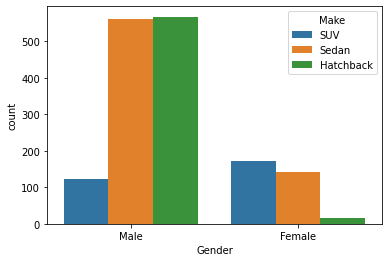

In [42]:
print('Proportion of females buy SUV= ',173/329 ,' (no. of females bought SUV / Total no. of females)')
print('Proportion of males buy SUV= ',124/1252 ,' (no. of males bought SUV / Total no. of males)')
sns.countplot(data=df, x='Gender', hue='Make');

In [43]:
# E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

# Analysing the Proportion of Car Make purchases for salaried customers

In [44]:
# total number of business and salaried
print('total number of business and salaried\n',df['Profession'].value_counts(),
      '\n\ntotal number of business and salaries own different cars\n',
      df.groupby('Profession')['Make'].value_counts(),df['Gender'].unique())

total number of business and salaried
 Salaried    896
Business    685
Name: Profession, dtype: int64 

total number of business and salaries own different cars
 Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: Make, dtype: int64 ['Male' 'Female']


Proportion of Hatchbacks purchased =  0.32589285714285715  (Total Hatchbacks bought by salaried / Total Cars purchased by salaried)
Proportion of SUV purchased =  0.23214285714285715  (Total SUVs bought by salaried / Total Cars purchased by salaried) 
Proportion of Sedan purchased =  0.4419642857142857   (Total Sedans bought by salaried / Total Cars purchased by salaried)


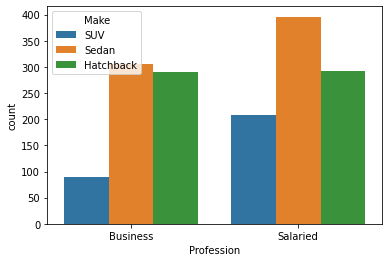

In [45]:
print('Proportion of Hatchbacks purchased = ',292/896 ,' (Total Hatchbacks bought by salaried / Total Cars purchased by salaried)')
print('Proportion of SUV purchased = ',208/896 ,' (Total SUVs bought by salaried / Total Cars purchased by salaried) ')
print('Proportion of Sedan purchased = ',396/896 ,'  (Total Sedans bought by salaried / Total Cars purchased by salaried)')
sns.countplot(data=df, x='Profession', hue='Make');

In [46]:
#E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

# calculation relation of salaried male with cars
print(df.groupby(by=df['Gender']).Profession.value_counts()[2:]
    ,'\n\n',
     df.groupby('Gender')[['Profession','Make']].value_counts(),df['Gender'].unique(),df['Profession'].unique())

Gender  Profession
Male    Salaried      672
        Business      580
Name: Profession, dtype: int64 

 Gender  Profession  Make     
Female  Salaried    SUV          118
                    Sedan         91
        Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
Male    Salaried    Sedan        305
        Business    Hatchback    290
        Salaried    Hatchback    277
        Business    Sedan        256
        Salaried    SUV           90
        Business    SUV           34
dtype: int64 ['Male' 'Female'] ['Business' 'Salaried']


Proportion of Hatchbacks purchased=  0.41220238095238093 ( Hatchbacks bought by salaried male/ Cars purchased by salaried male)
Proportion of SUV purchased =  0.13392857142857142  ( SUVs bought by salaried male / Cars purchased by salaried male) 
Proportion of Sedan purchased = 0.4538690476190476 ( Sedans bought by salaried male/ Cars purchased by salaried male)


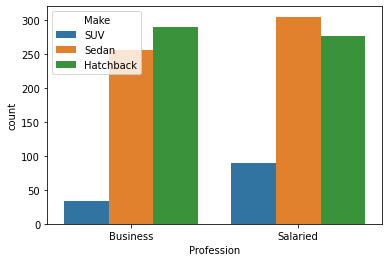

In [47]:
print('Proportion of Hatchbacks purchased= ',277/672 ,'( Hatchbacks bought by salaried male/ Cars purchased by salaried male)')
print('Proportion of SUV purchased = ',90/672 ,' ( SUVs bought by salaried male / Cars purchased by salaried male) ')
print('Proportion of Sedan purchased =',305/672 ,'( Sedans bought by salaried male/ Cars purchased by salaried male)')
dfmale=df[(df.Gender == "Male") ]
sns.countplot(data=dfmale, x='Profession', hue='Make');

## F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

Mean Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64 

 Median Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Gender', ylabel='Price'>

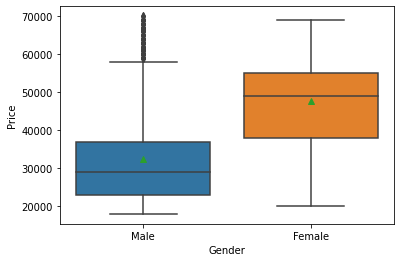

In [48]:
# F1 Gender
print('Mean',df.groupby(by=df['Gender']).Price.mean(),'\n\n','Median',
    df.groupby(by=df['Gender']).Price.median())

sns.boxplot(data=df,x='Gender',y='Price',showmeans=True)

Mean Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64 

 Median Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Personal_loan', ylabel='Price'>

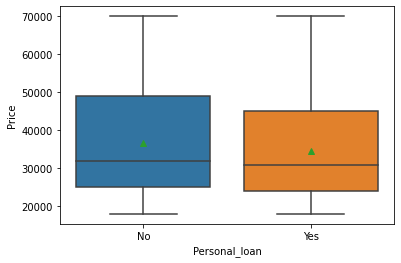

In [49]:
# F2 Personal_loan
print('Mean',df.groupby(by=df['Personal_loan']).Price.mean(),'\n\n','Median',
    df.groupby(by=df['Personal_loan']).Price.median())
sns.boxplot(data=df,x='Personal_loan',y='Price',showmeans=True)

## G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64 

 Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64


<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

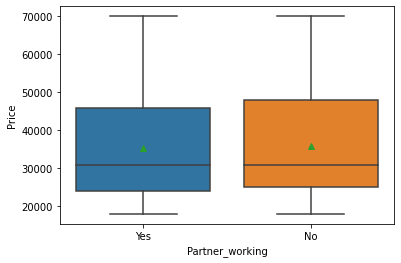

In [50]:
print(df.groupby(by=df['Partner_working']).Price.mean(),'\n\n',
    df.groupby(by=df['Partner_working']).Price.median())
sns.boxplot(data=df,x='Partner_working',y='Price',showmeans=True)

## H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

<AxesSubplot:title={'center':'Male'}, xlabel='Marital_status', ylabel='count'>

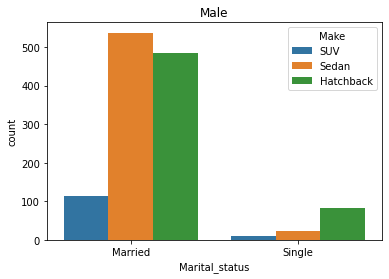

In [51]:
dfmale=df[(df.Gender == "Male") ]
dffemale=df[(df.Gender == "Female") ]

plt.title("Male")
sns.countplot(data=dfmale, x='Marital_status', hue='Make')

<AxesSubplot:title={'center':'Female'}, xlabel='Marital_status', ylabel='count'>

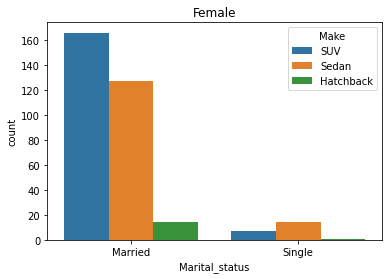

In [52]:
plt.title("Female")
sns.countplot(data=dffemale, x='Marital_status', hue='Make')

# Problem II : GODIGT Bank

**A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.**

**GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.**

**GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)**

## Analyze the dataset and list down the top 5 important variables, along with the business justifications.

In [53]:
 # read the file
df_godigt=pd.read_excel('godigt_cc_data.xlsx')

In [54]:
# show few top rows  of the file
df_godigt.head() 

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [55]:
# show the few last rows of the file
df_godigt.tail() 

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [56]:
# shows column of the dataset
df_godigt.columns

Index(['userid', 'card_no', 'card_bin_no', 'Issuer', 'card_type',
       'card_source_date', 'high_networth', 'active_30', 'active_60',
       'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [57]:
df_godigt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [58]:
df_godigt.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991122,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.572135,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000
